In [1]:
#importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_LZdllcl.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
def con_2_cat(df):
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
con_2_cat(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  category
 2   region                54808 non-null  category
 3   education             52399 non-null  category
 4   gender                54808 non-null  category
 5   recruitment_channel   54808 non-null  category
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  int64   
 8   previous_year_rating  50684 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  KPIs_met >80%         54808 non-null  int64   
 11  awards_won?           54808 non-null  int64   
 12  avg_training_score    54808 non-null  int64   
 13  is_promoted           54808 non-null  int64   
dtypes: category(5), float64(1), int64(8)
memory usage: 4.0

In [5]:
def numericalize(df,col,name):
    if not pd.api.types.is_numeric_dtype(col):
        df[name] = pd.Categorical(col).codes + 1 
for label,content in train.items():
    numericalize(train,content,label)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int8   
 2   region                54808 non-null  int8   
 3   education             54808 non-null  int8   
 4   gender                54808 non-null  int8   
 5   recruitment_channel   54808 non-null  int8   
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), int8(5)
memory usage: 4.0 MB


In [6]:
train[(train.previous_year_rating.isnull()) & (train.length_of_service)>1 ] # since there is no previous year rating the 
# filling with zeros as there period of service is just 1 year


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [7]:
train.fillna(0.0,inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int8   
 2   region                54808 non-null  int8   
 3   education             54808 non-null  int8   
 4   gender                54808 non-null  int8   
 5   recruitment_channel   54808 non-null  int8   
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), int8(5)
memory usage: 4.0 MB


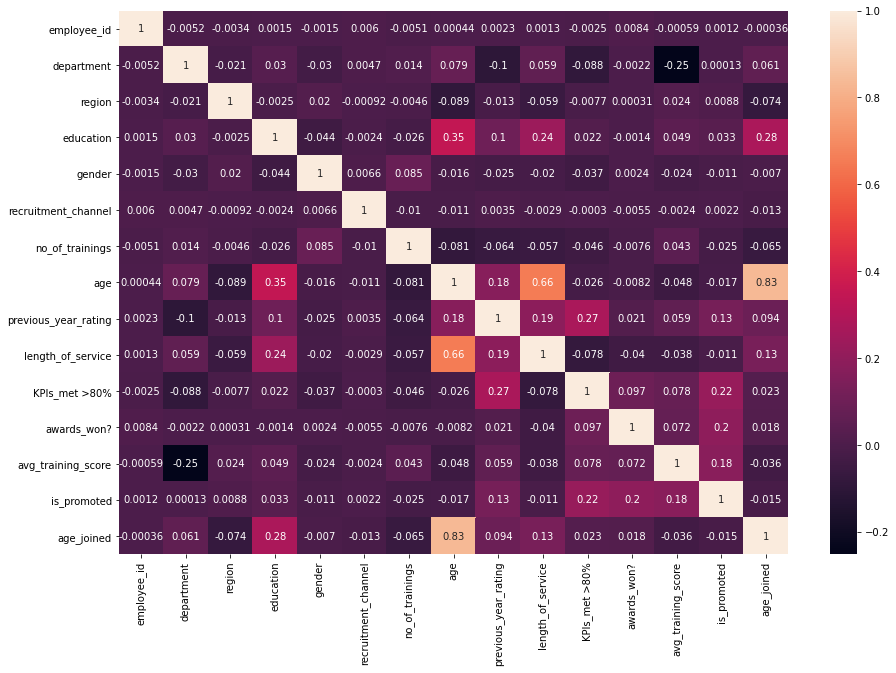

In [8]:
train['age_joined'] = train.age - train.length_of_service
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot = True)
plt.show()

In [10]:
#train['sum_performance'] = (train.no_of_trainings + train.previous_year_rating + train.length_of_service)
#train.drop('average_performance',axis =1,inplace = True)

In [9]:
train['imp_sum'] = train['awards_won?'] + train['KPIs_met >80%'] +train.previous_year_rating
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int8   
 2   region                54808 non-null  int8   
 3   education             54808 non-null  int8   
 4   gender                54808 non-null  int8   
 5   recruitment_channel   54808 non-null  int8   
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
 14  age_joined            54808 non-null  int64  
 15  imp_sum            

In [10]:
train['training_hours'] = train.no_of_trainings * train.avg_training_score
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_joined,imp_sum,training_hours
0,65438,8,32,3,1,3,1,35,5.0,8,1,0,49,0,27,6.0,49
1,65141,5,15,1,2,1,1,30,5.0,4,0,0,60,0,26,5.0,60
2,7513,8,11,1,2,3,1,34,3.0,7,0,0,50,0,27,3.0,50
3,2542,8,16,1,2,1,2,39,1.0,10,0,0,50,0,29,1.0,100
4,48945,9,19,1,2,1,1,45,3.0,2,0,0,73,0,43,3.0,73


In [11]:
# train.drop('sum_performance',axis = 1, inplace = True)
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [12]:
avg_score = train.groupby(['department','region'])['avg_training_score'].transform('mean')
avg_score = avg_score/avg_score.mean()

In [14]:
train['avg_score'] = avg_score

In [15]:
from sklearn.utils import resample

df_minority_upsampled = resample(train, 
                                 replace=True,     
                                 n_samples=5000,    
                                 random_state=123) 
df_train = pd.concat([train, df_minority_upsampled])
df_train.is_promoted.value_counts()

0    54720
1     5088
Name: is_promoted, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
df_sc = scaler.fit_transform(train.drop(['is_promoted','education','no_of_trainings','gender'],axis = 1))
y = train.is_promoted

In [134]:
def split_val(a,n): return a[:n].copy(),a[n:].copy()
n_valid = 20000
n_trn = len(train)-n_valid
X_train, X_valid = split_val(df_sc, n_trn)
y_train, y_valid = split_val(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape

((34808, 16), (34808,), (20000, 16))

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df_sc, y, test_size=0.33, random_state=42, stratify = y)

In [19]:
def print_score(m):
    res = [f1_score(m.predict(X_train), y_train),
           f1_score(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [21]:
from sklearn.metrics import f1_score
from xgboost.sklearn import XGBClassifier

param = {'colsample_bytree': 0.9045799458309223,
          'learning_rate': 0.09113426106388132,
          'max_depth': 4,
          'min_child_weight': 4,
          'n_estimators': 795,
          'subsample': 0.7281185407840126}
%time model2 =  XGBClassifier(**param).fit(X_train, y_train)
print_score(model2)

Wall time: 14.9 s
[0.6005302695536897, 0.5150254276467868, 0.9507638680863811, 0.9420025432631172]


In [30]:

from sklearn.ensemble import RandomForestClassifier


m = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1,min_samples_split = 2,
                           max_features = 'auto', n_jobs=1, max_depth = 40,class_weight = 'balanced',
                           oob_score = True)

%time m.fit(X_train, y_train)
print_score(m)

Wall time: 5.14 s
[1.0, 0.4050377833753148, 1.0, 0.9347044838834522, 0.9343972114049182]


In [26]:
threshold = 0.2

predicted_proba = m.predict_proba(X_valid)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

print_score(m)

[0.9998401278976818, 0.43992248062015504, 0.999972767626154, 0.9360866920992978, 0.9346423027695324]


In [83]:
mf = RandomForestClassifier(n_estimators = 1066, min_samples_split = 2,
                            min_samples_leaf = 1, max_features = 'auto',class_weight = 'balanced',
                            max_depth = 40, bootstrap = False)
%time mf.fit(X_train, y_train)
print_score(mf)

Wall time: 1min 13s
[1.0, 0.48291782086795937, 1.0, 0.9380770719301156]


In [60]:
m1 = RandomForestClassifier(n_estimators = 100,min_samples_leaf = 5,#5 is better
                            max_features = 0.5,class_weight = 'balanced',
                            n_jobs=1,oob_score = True)
%time m1.fit(X_train, y_train)
print_score(m1)

Wall time: 6.37 s
[0.9074591731646315, 0.4816862474084313, 0.9828708368508483, 0.9170675070492619, 0.913918466272705]


In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000,max_depth=3, 
                                 min_samples_split=2, min_samples_leaf=1, 
                                 subsample=1,max_features='sqrt', random_state=42)
%time gbc.fit(X_train,y_train)
print_score(gbc)

Wall time: 20.7 s
[0.5275080906148867, 0.4862819299905393, 0.9443370278587184, 0.9399568751036657]


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

score = make_scorer(f1_score)

p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
           'n_estimators':[100,250,500,750,1000,1250,1500,1750],
           'max_depth':[2,3,4,5,6,7],
           'min_samples_leaf' : [3, 4, 5],
           'min_samples_split' : [2, 5, 10],
          'max_features' : ['auto', 'sqrt'],
          }

tuning = GridSearchCV( estimator = GradientBoostingClassifier(), 
                      param_grid = p_test3, scoring=score,n_jobs=4,iid=False, cv=5)
%time tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

lg = LogisticRegression()
sv = SVC()
rn = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1,min_samples_split = 2,
                           max_features = 'auto', n_jobs=1, max_depth = 40,class_weight = 'balanced',
                           oob_score = True)

voting_clf = VotingClassifier(estimators = [('lr',lg), ('rf',rn),('svc',sv)],voting = 'hard')
voting_clf.fit(X_train,y_train)
print_score(voting_clf)

[0.19517795637198623, 0.1770529994175888, 0.9236404237357371, 0.9218775916404047]


In [108]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

score = make_scorer(f1_score)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               scoring = score, verbose=2, return_train_score = True,refit = 'f1_score' ,
                               random_state=42, n_jobs = -1)
# Fit the random search model
%time rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 50.1min finished


Wall time: 51min 22s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [109]:
rf_random.best_params_

{'n_estimators': 1066,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [53]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

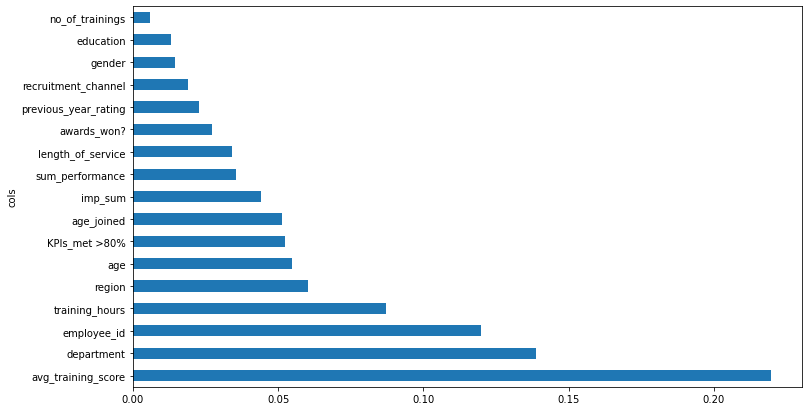

In [75]:
imp_cols =  rf_feat_importance(m,train.drop(['is_promoted'],axis =1))
imp_cols.plot('cols','imp','barh',figsize=(12,7),legend = False)
plt.show()

In [22]:
test = pd.read_csv('test_2umaH9m.csv')
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [23]:
test.loc[test['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
49,3720,Sales & Marketing,region_2,NaN,m,sourcing,1,36,5.0,4,1,0,49
67,26977,Operations,region_2,NaN,m,sourcing,1,28,3.0,3,0,0,59
89,2347,Analytics,region_15,NaN,m,other,2,37,5.0,8,1,0,82
127,42719,Analytics,region_21,NaN,m,sourcing,1,27,NaN,1,0,0,80
138,2721,Analytics,region_22,NaN,f,sourcing,2,26,5.0,3,1,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23415,14036,Sales & Marketing,region_7,NaN,m,other,6,26,3.0,3,0,0,48
23424,5890,Analytics,region_15,NaN,m,sourcing,1,34,3.0,5,0,0,87
23452,65429,Analytics,region_15,NaN,m,sourcing,1,30,2.0,7,0,0,83
23459,30477,Sales & Marketing,region_22,NaN,m,other,1,31,2.0,7,0,0,52


In [24]:
test.education.value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [25]:
test.education.fillna("Bachelor's",inplace = True)

In [26]:
con_2_cat(test)
for label,content in test.items():
    numericalize(test,content,label)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  int8   
 2   region                23490 non-null  int8   
 3   education             23490 non-null  int8   
 4   gender                23490 non-null  int8   
 5   recruitment_channel   23490 non-null  int8   
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), int8(5)
memory usage: 1.5 MB


In [27]:
test.previous_year_rating.fillna(0,inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  int8   
 2   region                23490 non-null  int8   
 3   education             23490 non-null  int8   
 4   gender                23490 non-null  int8   
 5   recruitment_channel   23490 non-null  int8   
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), int8(5)
memory usage: 1.5 MB


In [28]:
#test['sum_performance'] = (test.no_of_trainings + test.previous_year_rating + test.length_of_service)
test['imp_sum'] = test['awards_won?'] + test['KPIs_met >80%'] +test.previous_year_rating
test['training_hours'] = test.no_of_trainings * test.avg_training_score
#test['age_joined'] = test.age - test.length_of_service

In [29]:
test['age_joined'] = test.age - test.length_of_service
avg_score = test.groupby(['department','region'])['avg_training_score'].transform('mean')
avg_score = avg_score/avg_score.mean()
test['avg_score'] = avg_score
test.info(),train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  int8   
 2   region                23490 non-null  int8   
 3   education             23490 non-null  int8   
 4   gender                23490 non-null  int8   
 5   recruitment_channel   23490 non-null  int8   
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
 13  imp_sum               23490 non-null  float64
 14  training_hours        23490 non-null  int64  
 15  age_joined         

(None, None)

In [51]:
#test.drop(['imp_sum','training_hours','age_joined'],axis =1,inplace = True)

In [30]:
test_sc = scaler.transform(test.drop(['education','no_of_trainings','gender'],axis = 1))
test_dic={}
# 'for i,j in zip(test.employee_id,(mf.predict(test_sc))):
#     test_dic[i] =j'
test_result = pd.DataFrame()
test_result['employee_id'] = test.employee_id
test_result['is_promoted'] = (model2.predict(test_sc) )
test_result = pd.DataFrame({'employee_id':test.employee_id,
                           'is_promoted':model2.predict(test_sc)})
test_result.set_index('employee_id',inplace = True)

test_result.head()

,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [31]:
test_result.shape

(23490, 1)

In [32]:
test_result.is_promoted.value_counts()

0    22671
1      819
Name: is_promoted, dtype: int64

In [33]:
test_result.to_csv('second_26.csv')